# Creation of a Convolutional Neural Network for product classification

### Import of necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Part 1

### Data loading and preparation

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Implementation of a Multilayer Neural Network (MNN) for comparison

In [7]:
# Implementation of the model
model_MNN = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_MNN.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_MNN = model_MNN.fit(train_images, train_labels, epochs=40, batch_size=128, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_MNN.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/40
375/375 [==============================] - 2s 4ms/step - loss: 0.6688 - accuracy: 0.7662 - val_loss: 0.4524 - val_accuracy: 0.8342
Epoch 2/40
375/375 [==============================] - 1s 3ms/step - loss: 0.4527 - accuracy: 0.8391 - val_loss: 0.3949 - val_accuracy: 0.8564
Epoch 3/40
375/375 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8555 - val_loss: 0.3656 - val_accuracy: 0.8694
Epoch 4/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8664 - val_loss: 0.3608 - val_accuracy: 0.8722
Epoch 5/40
375/375 [==============================] - 1s 4ms/step - loss: 0.3504 - accuracy: 0.8715 - val_loss: 0.3404 - val_accuracy: 0.8760
Epoch 6/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8795 - val_loss: 0.3233 - val_accuracy: 0.8827
Epoch 7/40
375/375 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8840 - val_loss: 0.3321 - val_accuracy: 0.8800
Epoch 

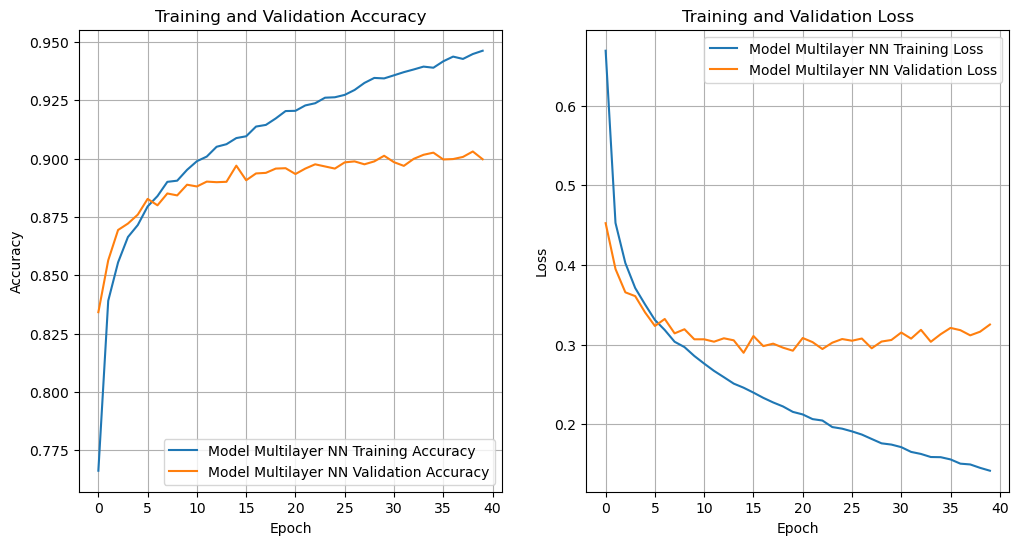

In [8]:
# Visualization of the training schedule
def plot_training_histories(histories, names):
    plt.figure(figsize=(12, 6))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=name + ' Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=name + ' Training Loss')
        plt.plot(history.history['val_loss'], label=name + ' Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function to plot the graph
plot_training_histories([history_MNN], ['Model Multilayer NN'])

### Implementation of a Convolutional Neural Network (CNN) with the same hyperparameters as MNN (RELU activation, 20% dropout, ADAMAX optimizer, 40 epochs, batch size 128)

In [9]:
# Implementation of the model
model_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_CNN.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_CNN = model_CNN.fit(train_images, train_labels, epochs=40, batch_size=128, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/40
375/375 [==============================] - 4s 10ms/step - loss: 0.8601 - accuracy: 0.6878 - val_loss: 0.5388 - val_accuracy: 0.7996
Epoch 2/40
375/375 [==============================] - 3s 9ms/step - loss: 0.5487 - accuracy: 0.7992 - val_loss: 0.4640 - val_accuracy: 0.8345
Epoch 3/40
375/375 [==============================] - 3s 9ms/step - loss: 0.4805 - accuracy: 0.8247 - val_loss: 0.4260 - val_accuracy: 0.8470
Epoch 4/40
375/375 [==============================] - 3s 9ms/step - loss: 0.4359 - accuracy: 0.8426 - val_loss: 0.3992 - val_accuracy: 0.8553
Epoch 5/40
375/375 [==============================] - 3s 9ms/step - loss: 0.4069 - accuracy: 0.8524 - val_loss: 0.3744 - val_accuracy: 0.8639
Epoch 6/40
375/375 [==============================] - 3s 9ms/step - loss: 0.3807 - accuracy: 0.8627 - val_loss: 0.3511 - val_accuracy: 0.8702
Epoch 7/40
375/375 [==============================] - 4s 9ms/step - loss: 0.3615 - accuracy: 0.8690 - val_loss: 0.3434 - val_accuracy: 0.8732
Epoch

In [10]:
def plot_training_histories_compare(histories, names):
    plt.figure(figsize=(12, 6))

    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

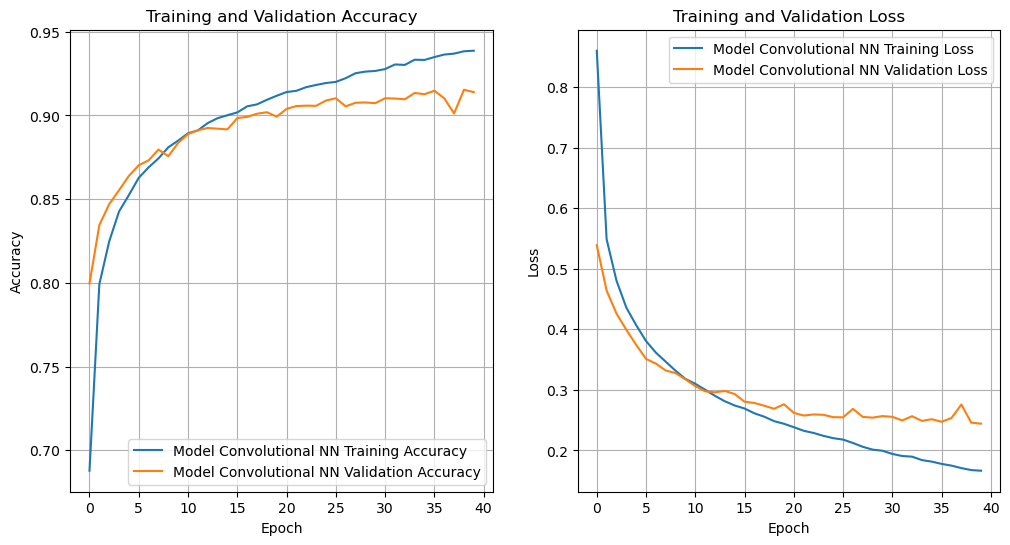

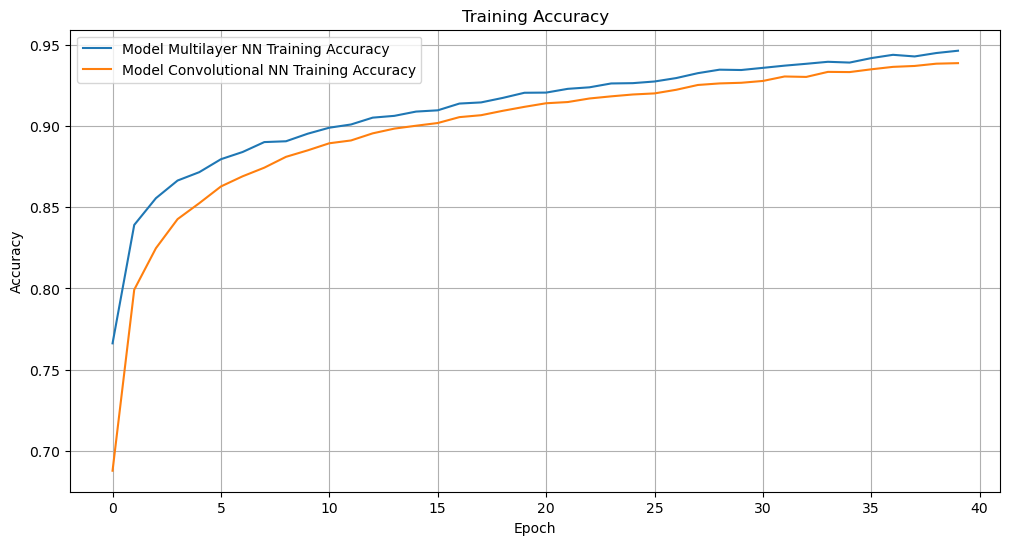

In [11]:
# Visualization of the training schedule
plot_training_histories([history_CNN], ['Model Convolutional NN'])

# Training graphs for models
plot_training_histories_compare([history_MNN, history_CNN], ['Model Multilayer NN', 'Model Convolutional NN'])

### Сonclusion:

##### As we can see, we get a better test accuracy result of 91.19% with a Convolutional Neural Network (model_CNN), than with a Multilayer Neural Network (model_MNN) - 89.43%, that have the same hyperparameters: RELU activation, ADAMAX optimizer, 40 epochs, 20% Dropout and batch size 128. Although the training accuracy is higher for the MNN model than for the CNN model

## Part 2

### Data loading and preparation

In [12]:
random.seed(42)

# load data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
     
# data normalize
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Change the data dimension for VGG16
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
     
# Convert labels to categorical format
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
     
resized_train_images = tf.image.resize_with_pad(train_images, 32, 32)
resized_test_images = tf.image.resize_with_pad(test_images, 32, 32)

resized_train_images.shape, train_images.shape

(TensorShape([60000, 32, 32, 1]), (60000, 28, 28, 1))

### Base VGG16 ititialisation

In [13]:
# Load VGG16 convolutional base
img_input = layers.Input(shape=(32, 32, 1))
img_conc = layers.Concatenate()([img_input, img_input, img_input])
vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=img_conc, input_shape=(32, 32, 3))

vgg_base.trainable = True
set_trainable = False
for layer in vgg_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

### Implementation of a Convolutional Neural Network using VGG16 as a convolutional basis (CNN_VGG16)

In [14]:
# Create model
model_CNN_VGG16 = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_CNN_VGG16.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_CNN_VGG16 = model_CNN_VGG16.fit(
                    resized_train_images, 
                    train_labels, 
                    epochs=40, 
                    batch_size=128, 
                    validation_split=0.2                    
                    )

# Evaluate the model
test_loss, test_acc = model_CNN_VGG16.evaluate(resized_test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/40
375/375 [==============================] - 46s 121ms/step - loss: 0.5014 - accuracy: 0.8250 - val_loss: 0.3428 - val_accuracy: 0.8737
Epoch 2/40
375/375 [==============================] - 46s 123ms/step - loss: 0.3318 - accuracy: 0.8835 - val_loss: 0.3041 - val_accuracy: 0.8885
Epoch 3/40
375/375 [==============================] - 48s 128ms/step - loss: 0.2855 - accuracy: 0.8995 - val_loss: 0.2780 - val_accuracy: 0.9025
Epoch 4/40
375/375 [==============================] - 48s 127ms/step - loss: 0.2586 - accuracy: 0.9073 - val_loss: 0.2887 - val_accuracy: 0.8973
Epoch 5/40
375/375 [==============================] - 48s 127ms/step - loss: 0.2425 - accuracy: 0.9141 - val_loss: 0.2700 - val_accuracy: 0.9055
Epoch 6/40
375/375 [==============================] - 48s 127ms/step - loss: 0.2223 - accuracy: 0.9202 - val_loss: 0.2812 - val_accuracy: 0.8974
Epoch 7/40
375/375 [==============================] - 48s 127ms/step - loss: 0.2052 - accuracy: 0.9259 - val_loss: 0.2598 - val_ac

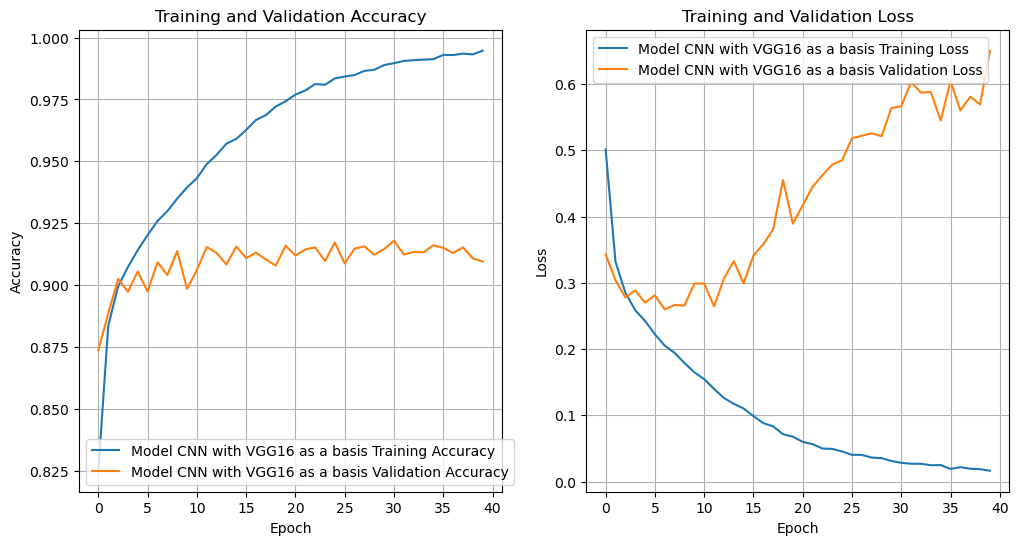

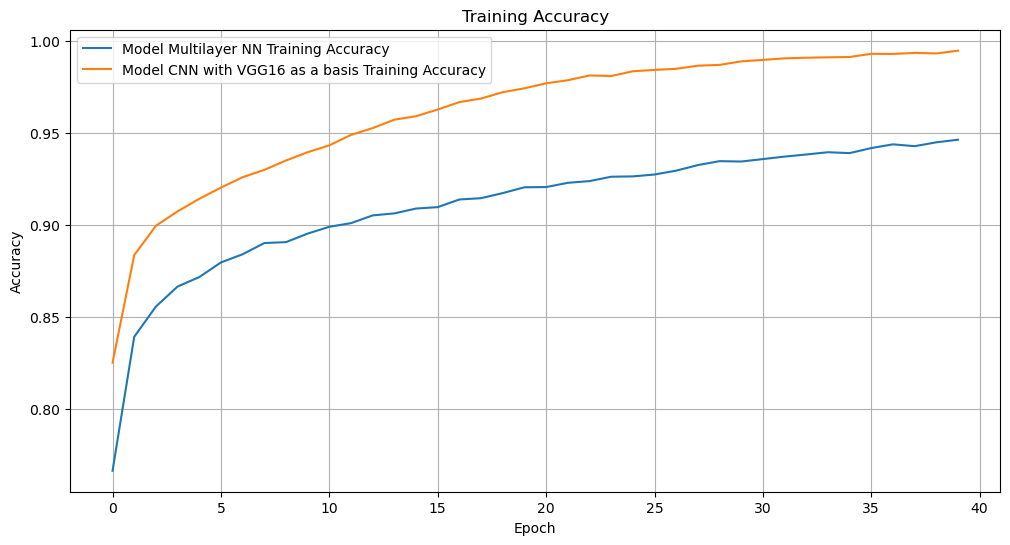

In [17]:
# Visualization of the training schedule
plot_training_histories([history_CNN_VGG16], ['Model CNN with VGG16 as a basis'])

# Training graphs for models
plot_training_histories_compare([history_MNN, history_CNN_VGG16], ['Model Multilayer NN', 'Model CNN with VGG16 as a basis'])

### Сonclusion:

##### As we can see, we get a better test accuracy result of 90.21% with a Convolutional Neural Network using VGG16 as a convolutional basis (CNN_VGG16), than with a Multilayer Neural Network (model_MNN) - 89.43%, that has the same hyperparameters: RELU activation, ADAMAX optimizer, 40 epochs, 20% Dropout and batch size 128.